#### Content
#### You are owing a supermarket mall and through membership cards, you have some basic data about your customers like #### Customer ID, age, gender, annual income and spending score.
#### Spending Score is something you assign to the customer based on your defined parameters like customer behavior and #### purchasing data.
#### Problem Statement
#### You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the #### sense can be given to marketing team and plan the strategy accordingly.
#### Inspiration
#### By the end of this case study , you would be able to answer below questions.
#### 1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
#### 2- Who are your target customers with whom you can start marketing strategy [easy to converse]
#### 3- How the marketing strategy works in real world

In [22]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [23]:
#import dataset
mall_data = pd.read_csv(r"C:\Users\Manikandan\Desktop\BESENT\DataScience-MacineLearning\projects\cluster project\Mall_Customers.csv")

In [24]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
# Finding No of Rows and Col
mall_data.shape

(200, 5)

# Analysing and preprocessing

In [26]:
# getting some information about data set
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
##### check missing values
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#  choosing customer segmentation using annual income and spending score

In [28]:
X = mall_data.iloc[:,[3,4]].values

In [29]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# choosing no of clusters
###  WCSS - within cluters sum of square

In [30]:
# finding wcs value for different no of cluters

wcss = []

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

C:\Users\Manikandan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


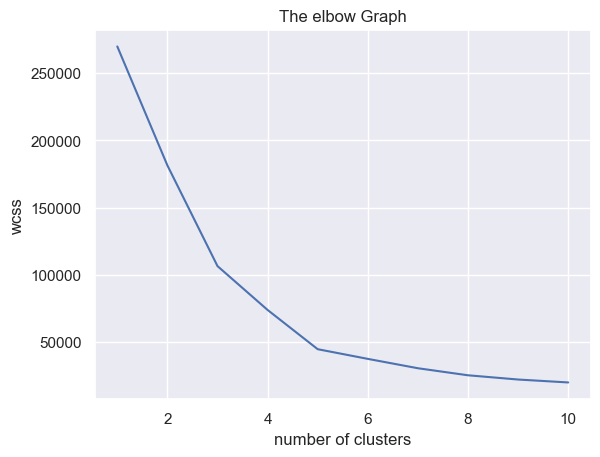

In [31]:
# elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow Graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

### optimum no of cluster 3,5 ---5 is choose

# Training K-Means cluster model

In [32]:
kmeans = KMeans(n_clusters =5, init='k-means++',random_state=42)
# return a label for each data point-5label
y = kmeans.fit_predict(X)
print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


# Visualizing all clusters

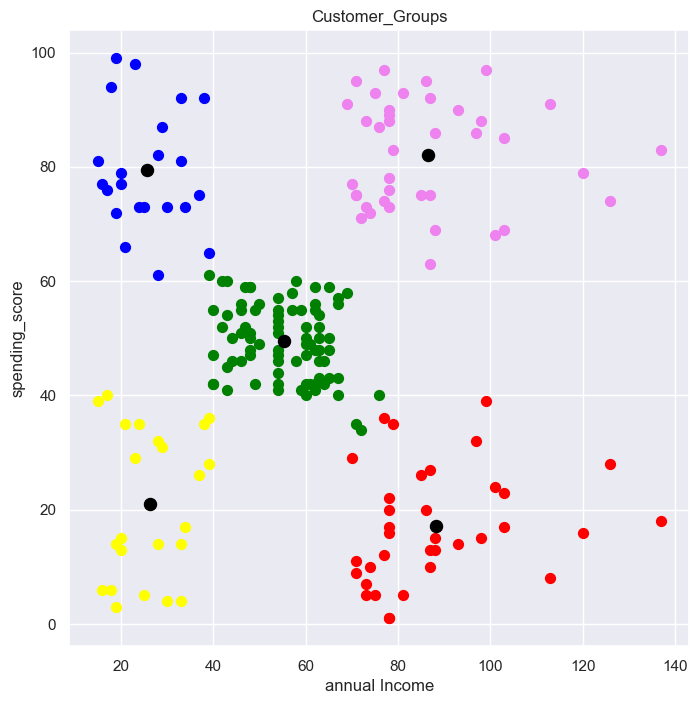

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0],X[y==0,1],c="green",s=50,label='Cluster1')
plt.scatter(X[y==1,0],X[y==1,1],c="red",s=50,label='Cluster2')
plt.scatter(X[y==2,0],X[y==2,1],c="yellow",s=50,label='Cluster3')
plt.scatter(X[y==3,0],X[y==3,1],c="blue",s=50,label='Cluster4')
plt.scatter(X[y==4,0],X[y==4,1],c="violet",s=50,label='Cluster5')

#plot centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=75,c="black",label="Centroids")
plt.title("Customer_Groups")
plt.xlabel("annual Income")
plt.ylabel("spending_score")
plt.show()

In [ ]:
# 1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
#### i can choose kmeans to achieve this ,because i can finding the group of people not an individual people,i can choose kmeans to group
#### what detail is more helpful for splitting  group, i can improve the selling so choosing annual income vs spending score is best choice, because i find how much income people or how much spending score
#### that based split a group and find the buissness problem



In [ ]:
# 2- Who are your target customers with whom you can start marketing strategy [easy to converse]
####  you can offer for red color and yellow color customers cluter1,clustor 2 because they have high annual income but not to make spending toomuch so you can offer for this customer,they spending good.
####  more offer for those people to spending the mall products



In [ ]:
# 3- How the marketing strategy works in real world?
##### my suggession is cluster1 and cluster2 is more offer to increasing the sales
##### so advertising focus on discount based to improve the buissness.